<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды


Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.



## Подготовка данных

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

In [ ]:
full = pd.read_csv('gold_recovery_full_new.csv')
test = pd.read_csv('gold_recovery_test_new.csv')
train = pd.read_csv('gold_recovery_train_new.csv')

In [ ]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Столбец с датой установим за индексы датафреймов

In [ ]:
train.set_index('date', inplace = True)
test.set_index('date', inplace = True)
full.set_index('date', inplace = True)

In [ ]:
train.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Посчитаем количество пропусков в датафрейме

In [ ]:
train_nan = train.isna().sum()/train.isna().count()

In [ ]:
pd.Series(train_nan.unique()).sort_values(ascending = False)

23    0.113436
21    0.030815
19    0.030249
8     0.020213
24    0.015337
1     0.014913
15    0.010177
3     0.007068
7     0.006078
16    0.005513
10    0.003251
18    0.002544
6     0.002262
17    0.002050
20    0.001555
25    0.001484
5     0.001414
9     0.001060
22    0.000707
14    0.000565
26    0.000424
4     0.000353
11    0.000283
13    0.000212
12    0.000141
0     0.000071
2     0.000000
dtype: float64

В некоторых столбцах доля пропусков достигает 11 процентов. Заменим пропуски медианами.

Заменим пропуски медианными значениями

In [ ]:
train = train.ffill(axis = 0)
test = test.ffill(axis = 0)

In [ ]:
pd.Series((train.isna().sum()/train.isna().count()).unique()).sort_values(ascending = False)

0    0.0
dtype: float64

Проверим формулу вычисления эффективности обогащения

In [ ]:
recovery = []
for i in train.index:
    C = train['rougher.output.concentrate_au'].loc[i]
    F = train['rougher.input.feed_au'].loc[i]
    T = train['rougher.output.tail_au'].loc[i]
    rec = C * (F - T) / F / (C - T) * 100
    recovery.append(rec)
recovery = pd.Series(recovery, index = train.index)
mean_absolute_error(train['rougher.output.recovery'], recovery)



1.0748911125799084e-14

MAE эффективности оказалась меньше одной миллиардной, формула работает

Проверим, каких столбцов нет в тестовой выборке:

In [ ]:
train_cols = train.columns
test_cols = test.columns

extra_cols = []
for i in train_cols:
    if i not in test_cols:
        extra_cols.append(i)
        print(i)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

Данные столбцы отсутствуют в тестовой выборке, так как она имитирует реальные, необработанные данные, а в этих столбцах задокументированы выходные данные каждого этапа фильтрации предыдущих образцов руды, а так же эффективность обогащения, расчитанная по этим данным. Удалим эти столбцы из обучающей выборки. Предварительно сохраним целевые признаки, а затем создадим две выборки - для предсказания rough_recovery и для предсказания final_recovery

In [ ]:
target_train_final = train['final.output.recovery']#целевые признаки
target_train_rough = train['rougher.output.recovery']

features_train_final = train.drop(extra_cols, axis = 1)#выборка для обучения предсказания final recovery
features_train_rough = features_train_final #выборка для обучения предсказания rough recovery
for i in test_cols:
    if 'rougher' not in i:
        features_train_rough = features_train_rough.drop(i, axis = 1)

features_test_final = test #выборка для предсказания final recovery
features_test_rough = test#выборка для предсказания rough recovery
for i in test_cols:
    if 'rougher' not in i:
        features_test_rough = features_test_rough.drop(i, axis = 1)



Стандартизируем данные

In [ ]:
scaler_final = StandardScaler()
scaler_rough = StandardScaler()
scaler_final.fit(features_train_final)
scaler_rough.fit(features_train_rough)


def standartize(features, scaler):
    index = features.index
    arr = scaler.transform(features)
    features_st = pd.DataFrame(arr, columns = features.columns, index = index)
    return features_st

features_train_final = standartize(features_train_final, scaler_final)
features_train_rough = standartize(features_train_rough, scaler_rough)
features_test_final = standartize(features_test_final, scaler_final)
features_test_rough = standartize(features_test_rough, scaler_rough)


## Анализ данных

Рассмотрим изменение концентрации каждого металла на каждом этапе обработки

In [ ]:
train_rough_col = []
for i in train.columns:
    if 'rougher' in i:
        train_rough_col.append(i)


train_prime_col = []
for i in train.columns:
    if 'primary' in i:
        train_prime_col.append(i)


train_second_col = []
for i in train.columns:
    if 'secondary' in i:
        train_second_col.append(i)


train_final_col = []
for i in train.columns:
    if 'final' in i:
        train_final_col.append(i)


In [ ]:
au_concentrates = []
for i in train.columns:
    if (('concentrate' in i and 'au' in i) or ('feed' in i and 'au' in i)) and 'calculation' not in i:
        au_concentrates.append(i)
print(au_concentrates)

au = train[au_concentrates]

pb_concentrates = []
for i in train.columns:
    if (('concentrate' in i and 'pb' in i) or ('feed' in i and 'pb' in i)) and 'calculation' not in i:
        pb_concentrates.append(i)
print(pb_concentrates)

pb = train[pb_concentrates]

ag_concentrates = []
for i in train.columns:
    if (('concentrate' in i and 'ag' in i) or ('feed' in i and 'ag' in i)) and 'calculation' not in i:
        ag_concentrates.append(i)
print(ag_concentrates)

ag = train[ag_concentrates]

['final.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.concentrate_au']
['final.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'rougher.input.feed_pb', 'rougher.output.concentrate_pb']
['final.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'rougher.input.feed_ag', 'rougher.output.concentrate_ag']


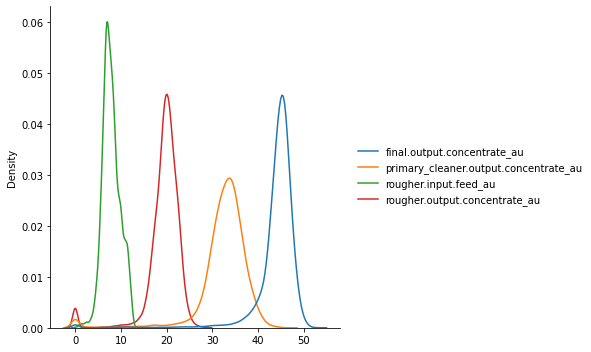

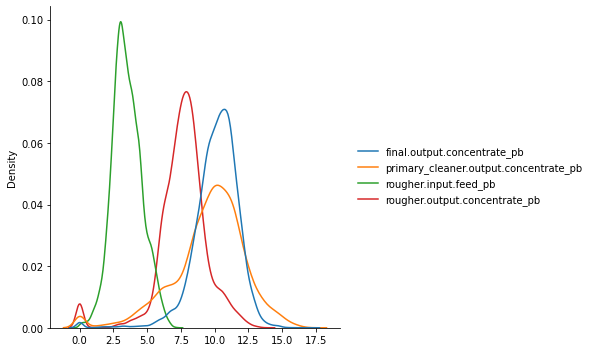

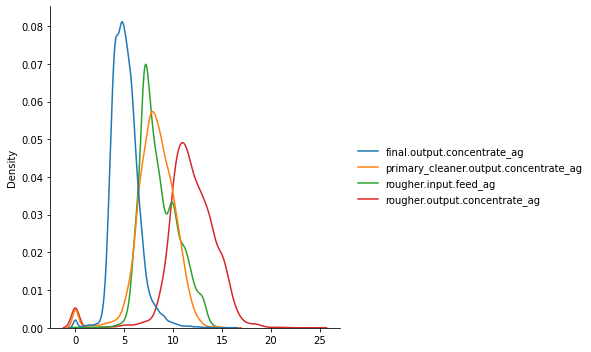

In [ ]:
sns.displot(au, kind = 'kde')
sns.displot(pb, kind = 'kde')
sns.displot(ag, kind = 'kde')

Как видно из графиков, концентрация золота повышалсь с каждым этапом очистки, чуть менее быстро повышалась концентрация свинца, а концентрация серебра постепенно уменьшалась.

Сравним распределения гранул сырья на тестовой и обучающей выборках

In [ ]:
train_feed = []
for i in train.columns:
    if 'feed' in i and 'size' in i:
        train_feed.append(i)

print(train_feed)

test_feed = []
for i in test.columns:
    if 'feed' in i and 'size' in i:
        test_feed.append(i)

print(train_feed)

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']
['primary_cleaner.input.feed_size', 'rougher.input.feed_size']


Распределение гранул этапа флотации:

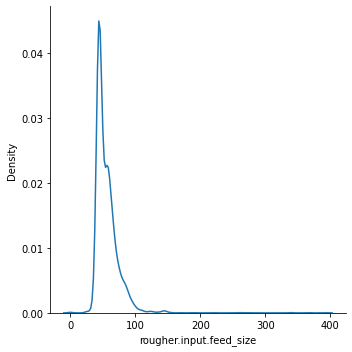

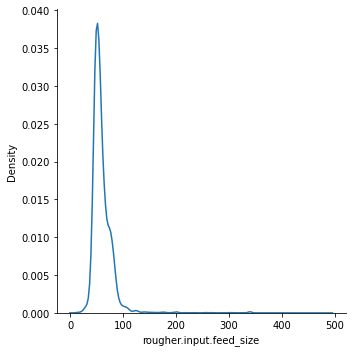

In [ ]:
sns.displot(test[test_feed[1]], kind = 'kde')
sns.displot(train[train_feed[1]], kind = 'kde')

Распределение гранул этапа первичной обработки:

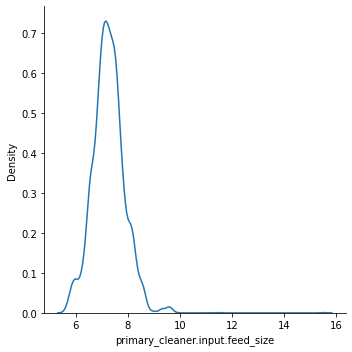

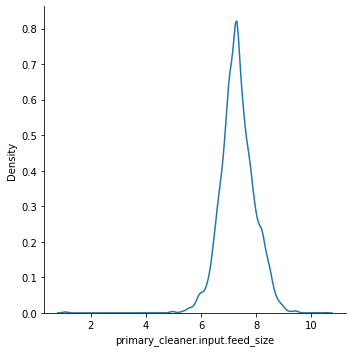

In [ ]:
sns.displot(test[test_feed[0]], kind = 'kde')
sns.displot(train[train_feed[0]], kind = 'kde')

Можно заметить, что пики распределений приходятся на примерно одни и те же промежутки по оси X, значит модель обучится корректно

Построим распределения концентрации металлов для каждой стадии очистки

In [ ]:
rough_in_distr = []
for i in train_rough_col:
    if ('au' in i or 'pb' in i or 'ag' in i or 'sol' in i) and ('feed' in i or 'concentrate' in i) and ('calculation' not in i and 'input' in i):
        rough_in_distr.append(i)
rough_in_feed = []
for i in train.index:
    rough_in_feed.append(train.loc[i,rough_in_distr[0]] + train.loc[i,rough_in_distr[1]] + train.loc[i,rough_in_distr[2]] + train.loc[i,rough_in_distr[3]])


rough_out_distr = []
for i in train_rough_col:
    if ('au' in i or 'pb' in i or 'ag' in i or 'sol' in i) and ('feed' in i or 'concentrate' in i) and ('calculation' not in i and 'output' in i):
        rough_out_distr.append(i)
rough_out_feed = []
for i in train.index:
    rough_out_feed.append(train.loc[i,rough_out_distr[0]] + train.loc[i,rough_out_distr[1]] + train.loc[i,rough_out_distr[2]] + train.loc[i,rough_out_distr[3]])
print(rough_out_distr)

prime_distr = []
for i in train_prime_col:
    if ('au' in i or 'pb' in i or 'ag' in i or 'sol' in i) and ('feed' in i or 'concentrate' in i) and ('calculation' not in i):
        prime_distr.append(i)
prime_feed = []
for i in train.index:
    prime_feed.append(train.loc[i,prime_distr[0]] + train.loc[i,prime_distr[1]] + train.loc[i,prime_distr[2]] + train.loc[i,prime_distr[3]])
print(prime_distr)

final_distr = []
for i in train_final_col:
    if ('au' in i or 'pb' in i or 'ag' in i or 'sol' in i) and ('feed' in i or 'concentrate' in i) and ('calculation' not in i):
        final_distr.append(i)

final_feed = []
for i in train.index:
    final_feed.append(train.loc[i,final_distr[0]] + train.loc[i,final_distr[1]] + train.loc[i,final_distr[2]] + train.loc[i,final_distr[3]])


['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']
['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au']


Распределение до флутации:

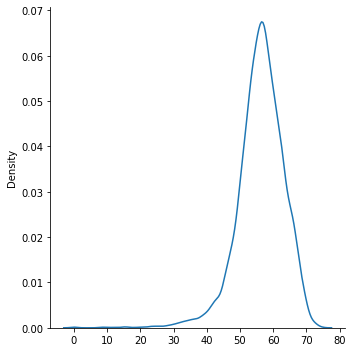

In [ ]:
sns.displot(rough_in_feed, kind = 'kde')

Распределение послу флутации:

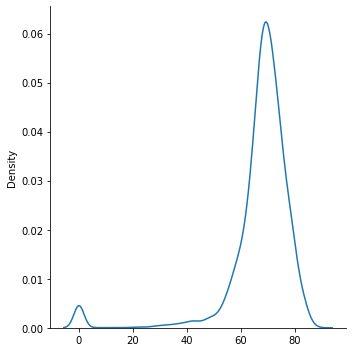

In [ ]:
sns.displot(rough_out_feed, kind = 'kde')

Распределение после первичной очистки:

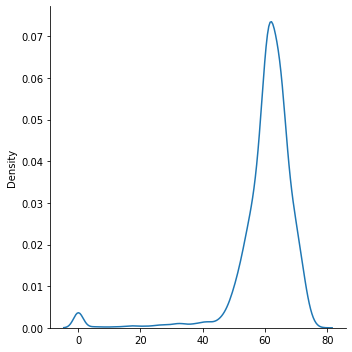

In [ ]:
sns.displot(prime_feed, kind = 'kde')

Финальное распределние:

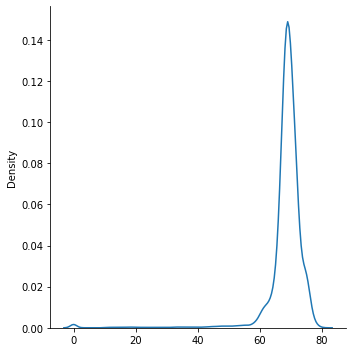

In [ ]:
sns.displot(final_feed, kind = 'kde')

На каждом этапе суммарное распределение гранул похоже на нормальное, при этом заметна тенденция увеличения среднего размера гранул по мере прохождения следующего этапа очистки. На этапах после первичной очистки и флутации заметны выбросы: большое количество гранул нулевого размера. Заполним нулевые значения медианами

In [ ]:
for i in rough_out_distr:
    train.loc[train[i] == 0,i] = train[i].median()

for i in prime_distr:
    train.loc[train[i] == 0,i] = train[i].median()

## Построение модели

Функция вычисления SMAPE

In [ ]:
def smape(target, predicted):
    s = sum(abs(target - predicted)*100/((abs(target) + abs(predicted))/2))
    return s/len(target)

Обучение и проверка моделей

### Первая модель - линейная регрессия.
Обучим модель и проверим проверим их точность кросс-валидацией

In [ ]:
smape_score = make_scorer(smape, greater_is_better = False)

In [ ]:
model = LinearRegression()
scores = cross_val_score(model, features_train_rough, target_train_rough, cv = 5, scoring = smape_score)
print('smape:', sum(scores)/len(scores))

smape: -12.472324262880543


### Вторая модель - дерево регрессии

In [ ]:

model = DecisionTreeRegressor()
grid_space={'max_depth':range(5,10),'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
grid = GridSearchCV(model,param_grid=grid_space,cv=5,scoring=smape_score, n_jobs = -1)
model_grid = grid.fit(features_train_rough, target_train_rough)

pd.options.mode.chained_assignment = None

print(model_grid.best_params_)
print('smape:', model_grid.best_score_)

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/conda/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 350, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most

{'criterion': 'poisson', 'max_depth': 7}
smape: -12.193588583060805


Проверим на адекватность данные модели:

In [ ]:
model = DecisionTreeRegressor(max_depth = 7, criterion = 'poisson')
model.fit(features_train_rough, target_train_rough)
rough_pred = model.predict(features_test_rough)
full_target_rough = full.loc[features_test_rough.index, 'rougher.output.recovery']
print('tree smape:',smape(full_target_rough, rough_pred))

dummy = DummyRegressor(strategy="mean")
dummy.fit(features_train_rough, target_train_rough)
full_target_final = full.loc[features_test_final.index, 'final.output.recovery']
dummy_pred = dummy.predict(features_test_rough)
print('dummy smape:',smape(full_target_rough, dummy_pred))


tree smape: 10.3698462237245
dummy smape: 10.379799283438471


In [ ]:
model = LinearRegression()
model.fit(features_train_rough, target_train_rough)
rough_pred = model.predict(features_test_rough)
full_target_rough = full.loc[features_test_rough.index, 'rougher.output.recovery']
print('linear regression smape:',smape(full_target_rough, rough_pred))

dummy = DummyRegressor(strategy="mean")
dummy.fit(features_train_rough, target_train_rough)
dummy_pred = dummy.predict(features_test_rough)
print('dummy smape:',smape(full_target_rough, dummy_pred))


linear regression smape: 9.32332518990904
dummy smape: 10.379799283438471


Как видно, smape константной модели и дерева регрессии почти одинаковы, значит, дерево предсказывает значения целевого признака, которые не далеки от средних значений, предсказанных константной моделью. В то же время у линейной регрессии smape меньше, чем у дамми-регрессора, значит эта модель ведет себя адекватнее. Вычислим при помощи нее итоговое sMAPE для тестовой выборки.

In [ ]:
model = LinearRegression()
model.fit(features_train_rough, target_train_rough)

rough_pred = model.predict(features_test_rough)
full_target = full.loc[features_test_rough.index, 'rougher.output.recovery']
rough_smape = smape(full_target_rough, rough_pred)

model = LinearRegression()
model.fit(features_train_final, target_train_final)
final_pred = model.predict(features_test_final)
full_target = full.loc[features_test_final.index, 'final.output.recovery']
final_smape = smape(full_target_final, final_pred)

sMAPE = rough_smape * 0.25 + final_smape * 0.75
print('sMAPE:',sMAPE)

sMAPE: 9.859480781388578


### Вывод
Перед началом выполнения проекта была поставлена задача построить модель, предсказывающую коэффициент очистки золота из золотосодержащей руды. В ходе выполнения работы были обработаны и исследованы предоставленные данные, извучены доли концентратов различных металлов на каждой из стадий обработки руды, по формуле расчитана эффективность флотации, точность вычислений проверены метрикой MAE, написана функция вычисления sMAPE для проверки точности модели. После, были составленый две модели обучения - линейная регрессия и лес регрессии, с помощью кросс-валидации и sMAPE были вычислены их качества и точности. Модели были проверены на адекватность с помощью константной модели. Лучший результат показала модель линейной регрессии, где sMAPE составила 9.859